In [38]:
import datetime

import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

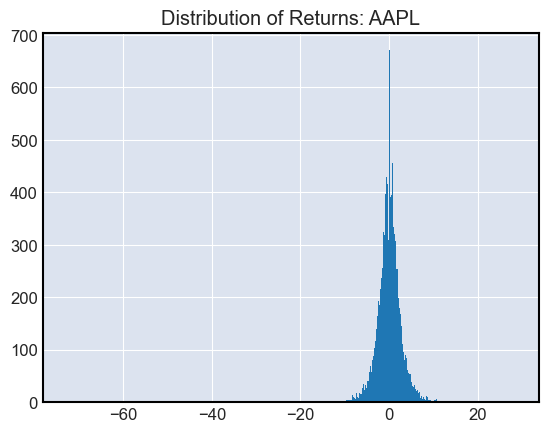

In [39]:
df_AAPL = pd.read_csv('data/AAPL.csv')

df_AAPL['Date'] = pd.to_datetime(df_AAPL['Date']).dt.date

df_AAPL['return'] = np.log(df_AAPL['Close'] / df_AAPL['Close'].shift(1))
df_AAPL.dropna(inplace=True)
plt.hist(df_AAPL['return'] * 100, bins=500)
plt.title('Distribution of Returns: AAPL')
plt.show()


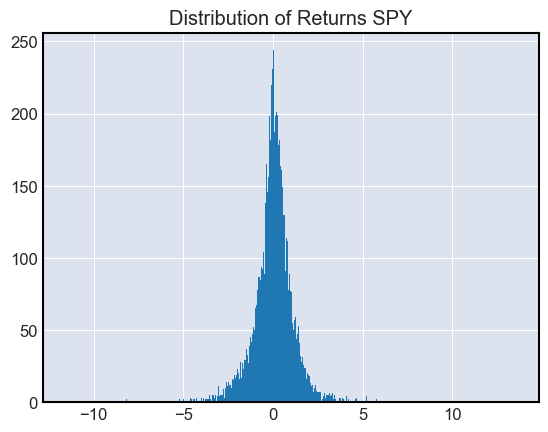

In [40]:
df_SPY = pd.read_csv('data/SPY.csv')

df_SPY['Date'] = pd.to_datetime(df_SPY['Date']).dt.date

df_SPY['return'] = np.log(df_SPY['Close'] / df_SPY['Close'].shift(1))
df_SPY.dropna(inplace=True)
plt.hist(df_SPY['return'] * 100, bins=500)
plt.title('Distribution of Returns SPY')
plt.show()

In [41]:
wwdc_days = [
    ('1990-05-07', '1990-05-11')    # 1990	May 7-11
,   ('1991-05-13', '1991-05-17')    # 1991	May 13-17	
,   ('1992-05-11', '1992-05-15')    # 1992	May 11-15	
,   ('1993-05-10', '1993-05-14')    # 1993	May 10-14	
,   ('1994-05-16', '1994-05-20')    # 1994	May 16-20	
,   ('1995-05-08', '1995-05-12')    # 1995	May 8-12	
,   ('1996-05-13', '1996-05-17')    # 1996	May 13-17	
,   ('1997-05-12', '1997-05-16')    # 1997	May 12-16	
,   ('1998-05-11', '1998-05-15')    # 1998	May 11-15	
,   ('1999-05-10', '1999-05-14')    # 1999	May 10-14	
,   ('2000-05-15', '2000-05-19')    # 2000	May 15-19	
,   ('2001-05-21', '2001-05-25')    # 2001	May 21-25	
,   ('2002-05-06', '2002-05-10')    # 2002	May 6-10	
,   ('2003-06-23', '2003-06-27')    # 2003	June 23-27	
,   ('2004-06-28', '2004-07-02')    # 2004	June 28-July 2	
,   ('2005-06-06', '2005-06-10')    # 2005	June 6-10	
,   ('2006-08-07', '2006-08-11')    # 2006	August 7-11	
,   ('2007-06-11', '2007-06-15')    # 2007	June 11-15	
,   ('2008-06-09', '2008-06-13')    # 2008	June 9-13	
,   ('2009-06-08', '2009-06-12')    # 2009	June 8-12	
,   ('2010-06-07', '2010-06-11')    # 2010	June 7-11	
,   ('2011-06-06', '2011-06-10')    # 2011	June 6-10	
,   ('2012-06-11', '2012-06-15')    # 2012	June 11-15	
,   ('2013-06-10', '2013-06-14')    # 2013	June 10-14	
,   ('2014-06-02', '2014-06-06')    # 2014	June 2-6	
,   ('2015-06-08', '2015-06-12')    # 2015	June 8-12	
,   ('2016-06-13', '2016-06-17')    # 2016	June 13-17	
,   ('2017-06-05', '2017-06-09')    # 2017	June 5-9	
,   ('2018-06-04', '2018-06-08')    # 2018	June 4-8	
,   ('2019-06-03', '2019-06-07')    # 2019	June 3-7	
,   ('2020-06-22', '2020-06-26')    # 2020	June 22-26	
,   ('2021-06-07', '2021-06-11')    # 2021	June 7-11	
,   ('2022-06-06', '2022-06-10')    # 2022	June 6-10	
# ,   ('2023-06-05', '2023-06-09')    # 2023	June 5-9
]

def date_mapper(d):
    r = (datetime.date.fromisoformat(d[0]), datetime.date.fromisoformat(d[1]))
    assert r[0] < r[1]
    return r

wwdc_days = list(map(date_mapper, wwdc_days))

wwdc_days

[(datetime.date(1990, 5, 7), datetime.date(1990, 5, 11)),
 (datetime.date(1991, 5, 13), datetime.date(1991, 5, 17)),
 (datetime.date(1992, 5, 11), datetime.date(1992, 5, 15)),
 (datetime.date(1993, 5, 10), datetime.date(1993, 5, 14)),
 (datetime.date(1994, 5, 16), datetime.date(1994, 5, 20)),
 (datetime.date(1995, 5, 8), datetime.date(1995, 5, 12)),
 (datetime.date(1996, 5, 13), datetime.date(1996, 5, 17)),
 (datetime.date(1997, 5, 12), datetime.date(1997, 5, 16)),
 (datetime.date(1998, 5, 11), datetime.date(1998, 5, 15)),
 (datetime.date(1999, 5, 10), datetime.date(1999, 5, 14)),
 (datetime.date(2000, 5, 15), datetime.date(2000, 5, 19)),
 (datetime.date(2001, 5, 21), datetime.date(2001, 5, 25)),
 (datetime.date(2002, 5, 6), datetime.date(2002, 5, 10)),
 (datetime.date(2003, 6, 23), datetime.date(2003, 6, 27)),
 (datetime.date(2004, 6, 28), datetime.date(2004, 7, 2)),
 (datetime.date(2005, 6, 6), datetime.date(2005, 6, 10)),
 (datetime.date(2006, 8, 7), datetime.date(2006, 8, 11)),
 (d

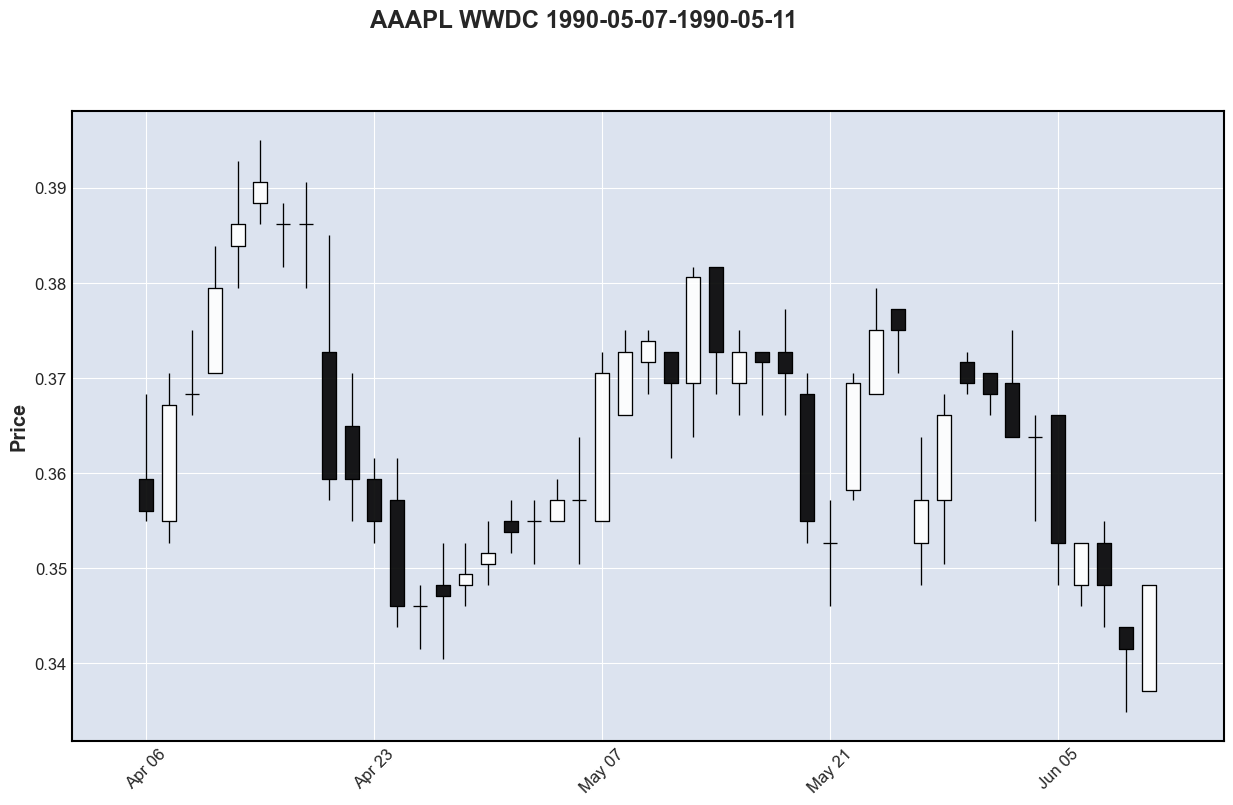

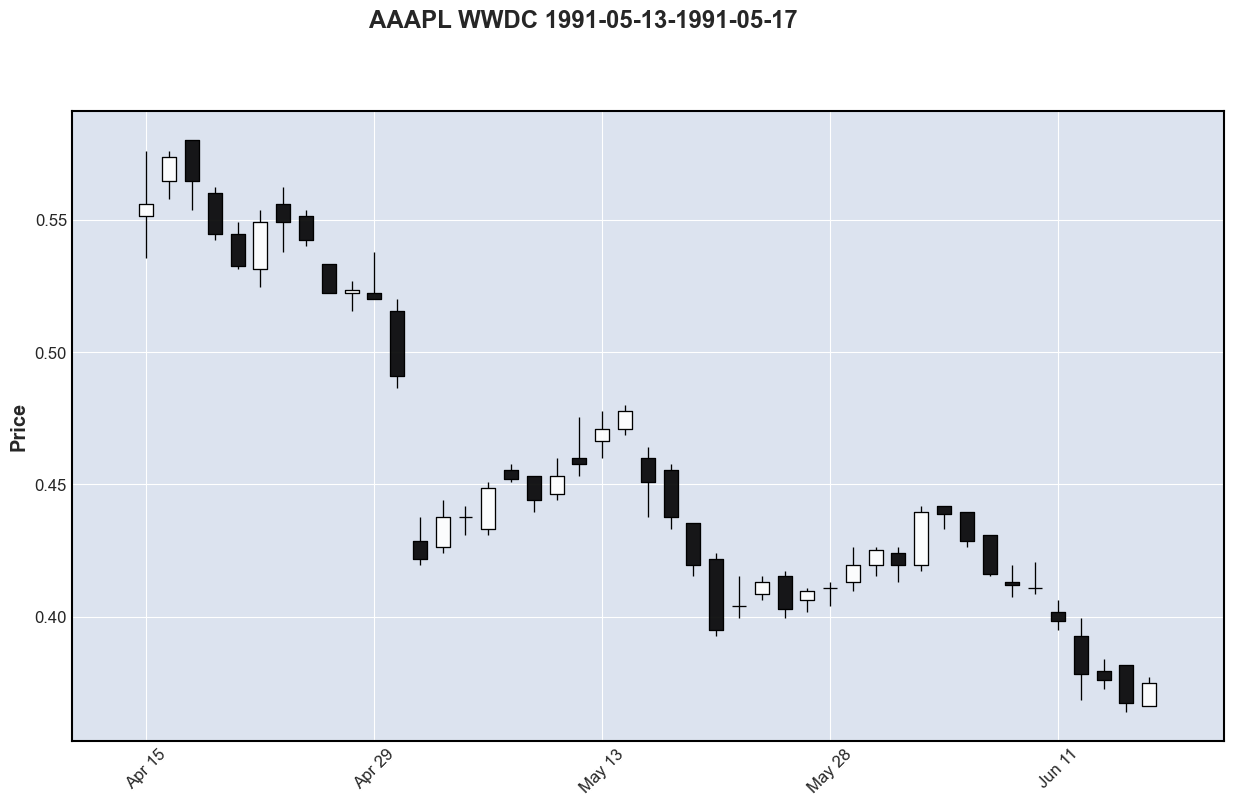

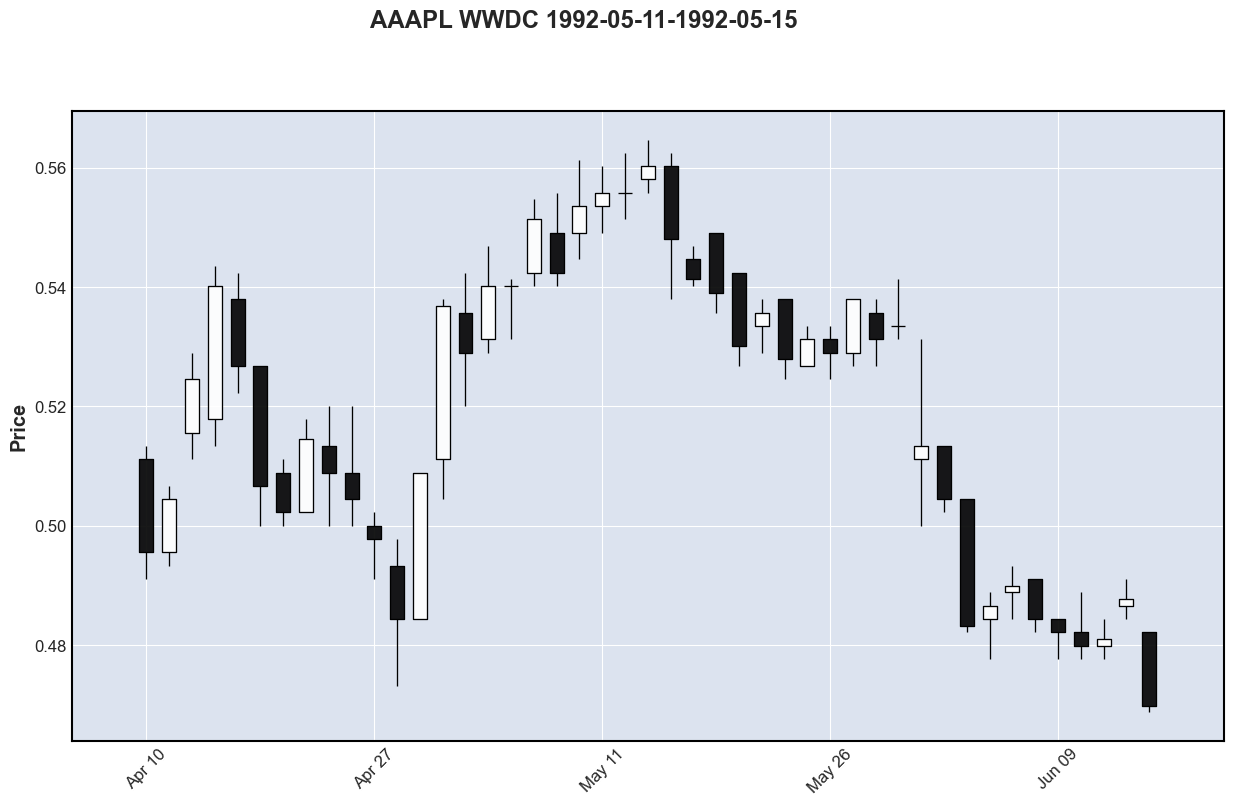

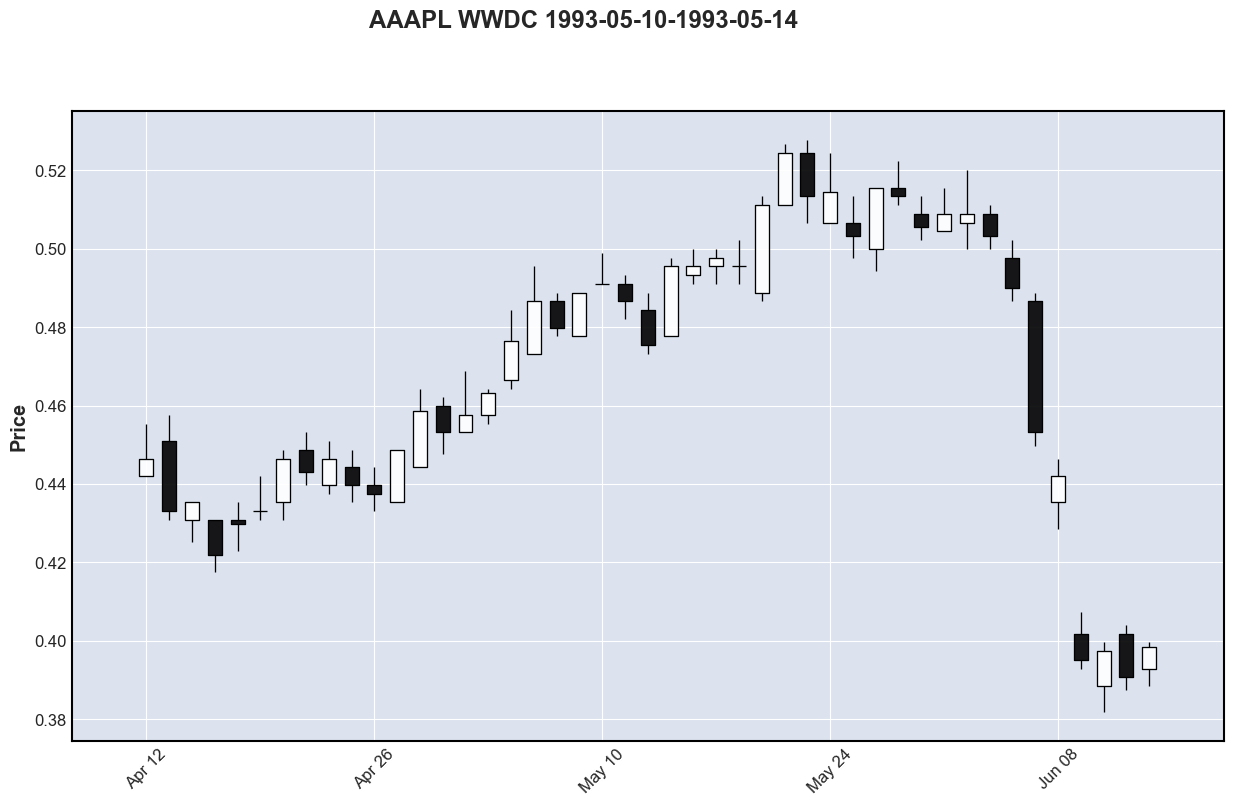

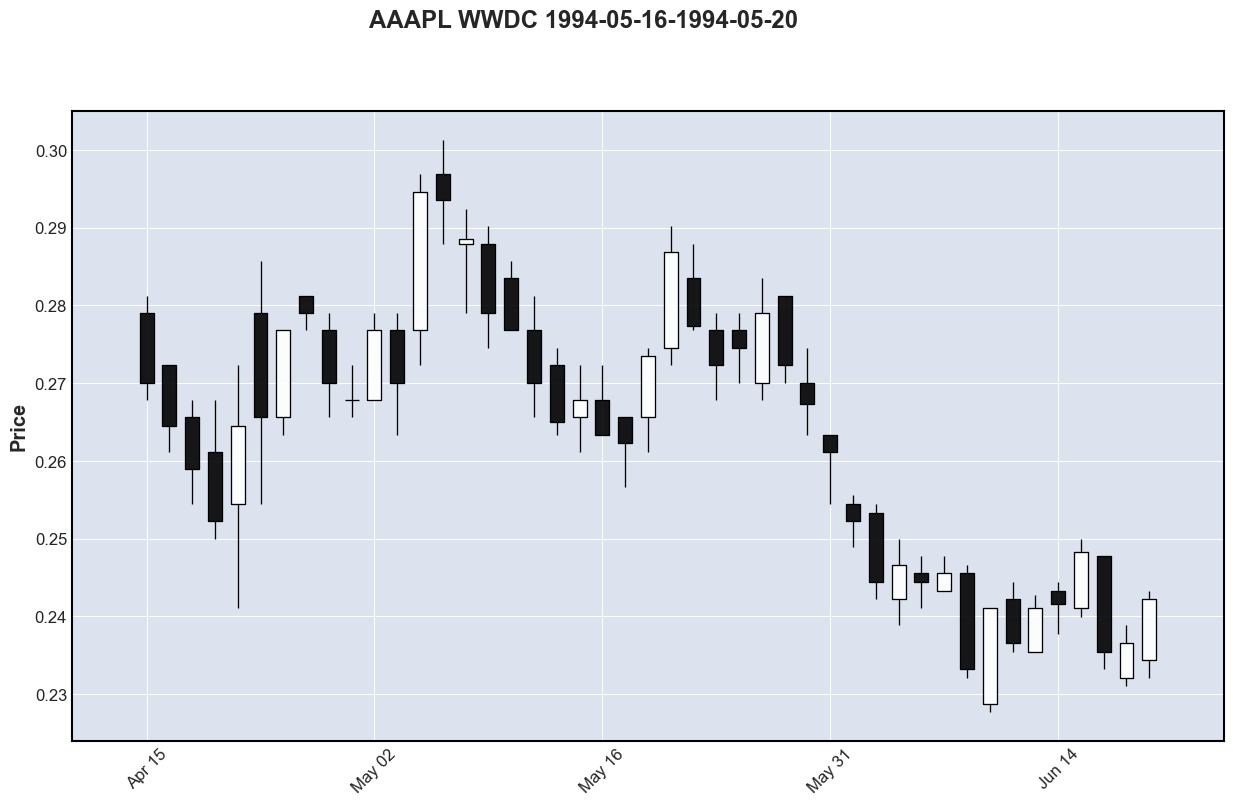

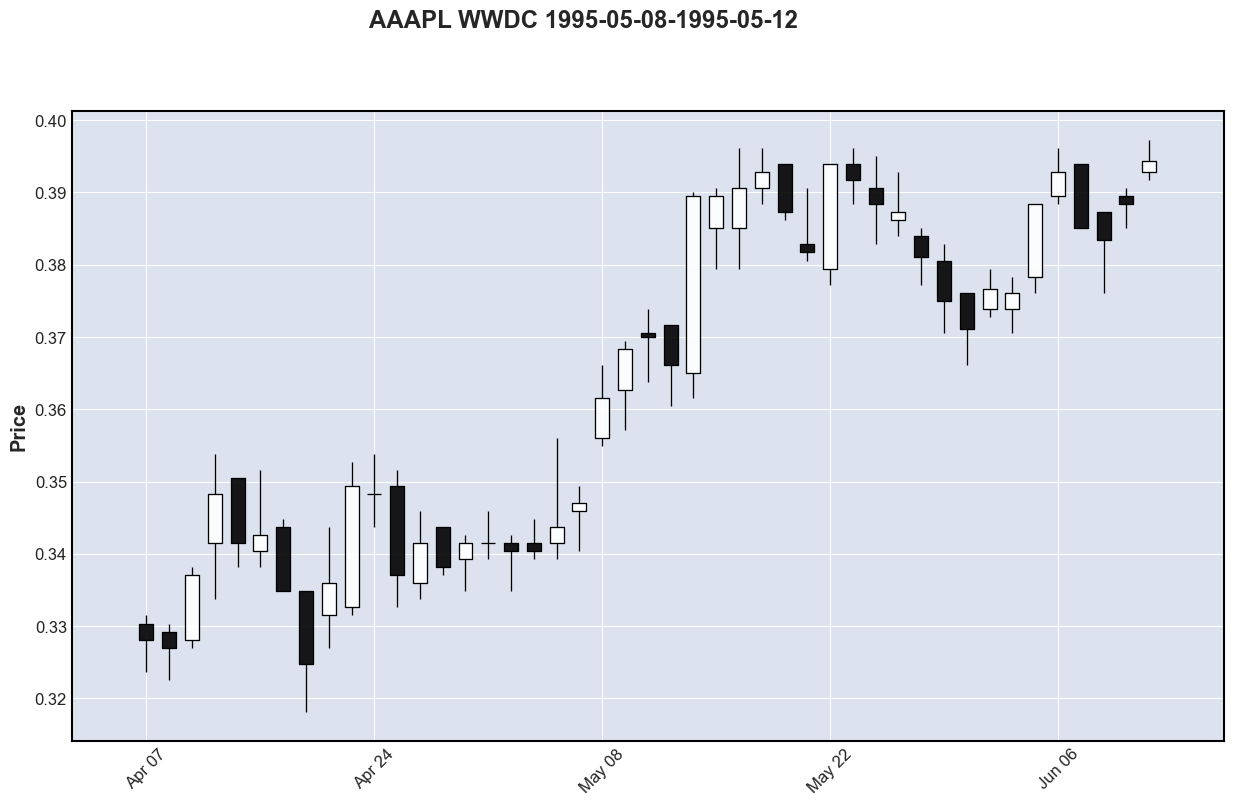

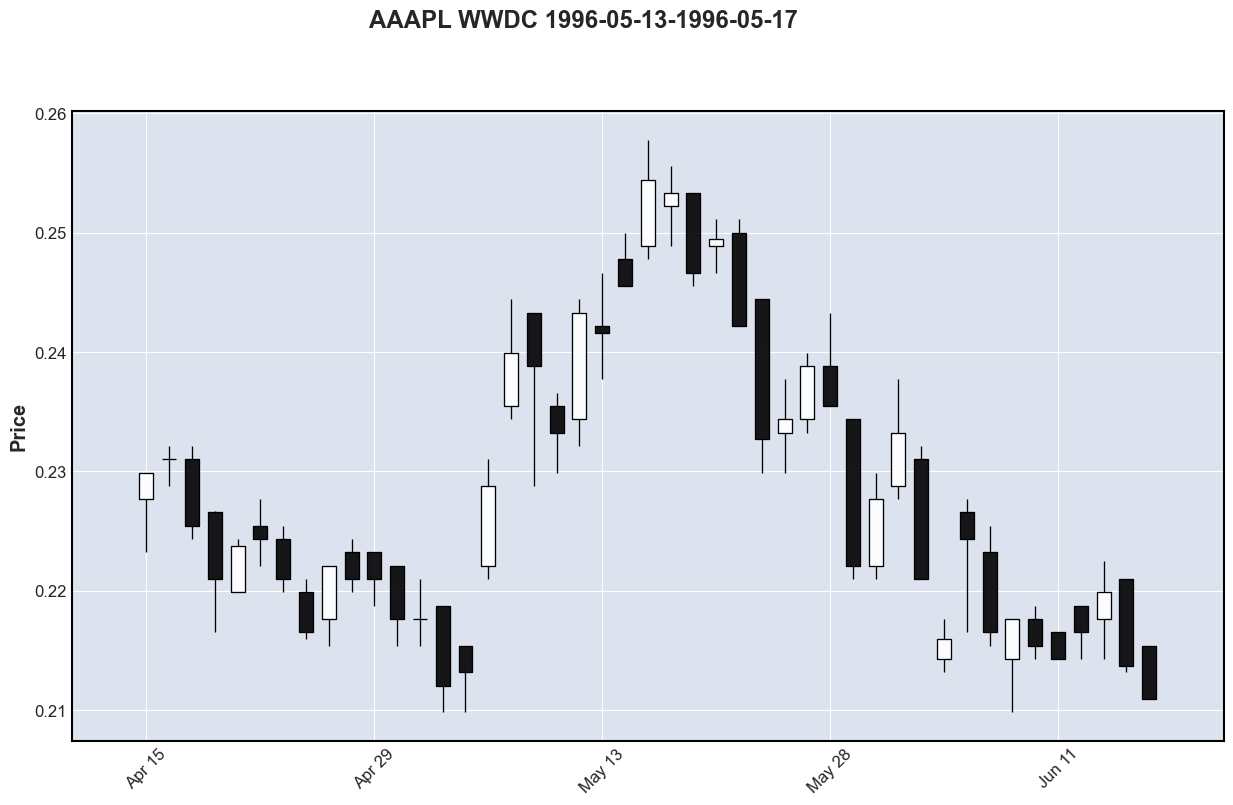

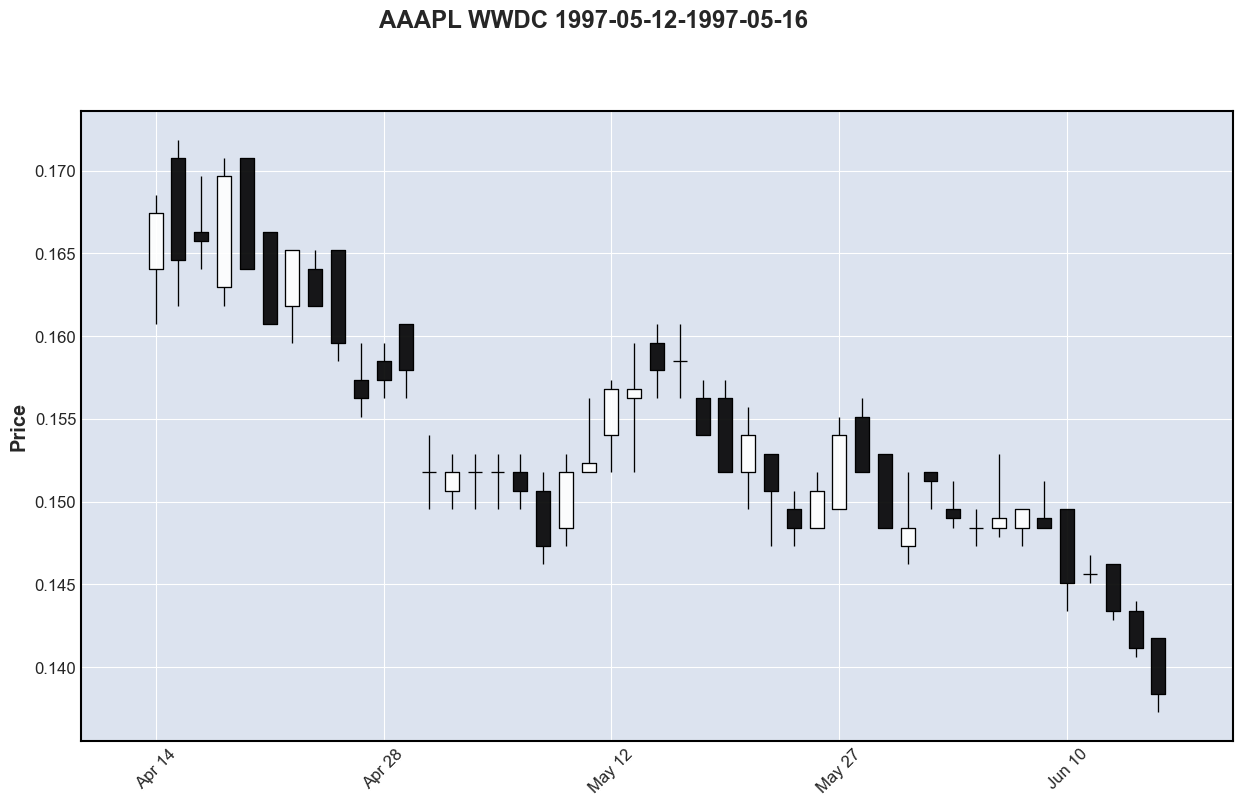

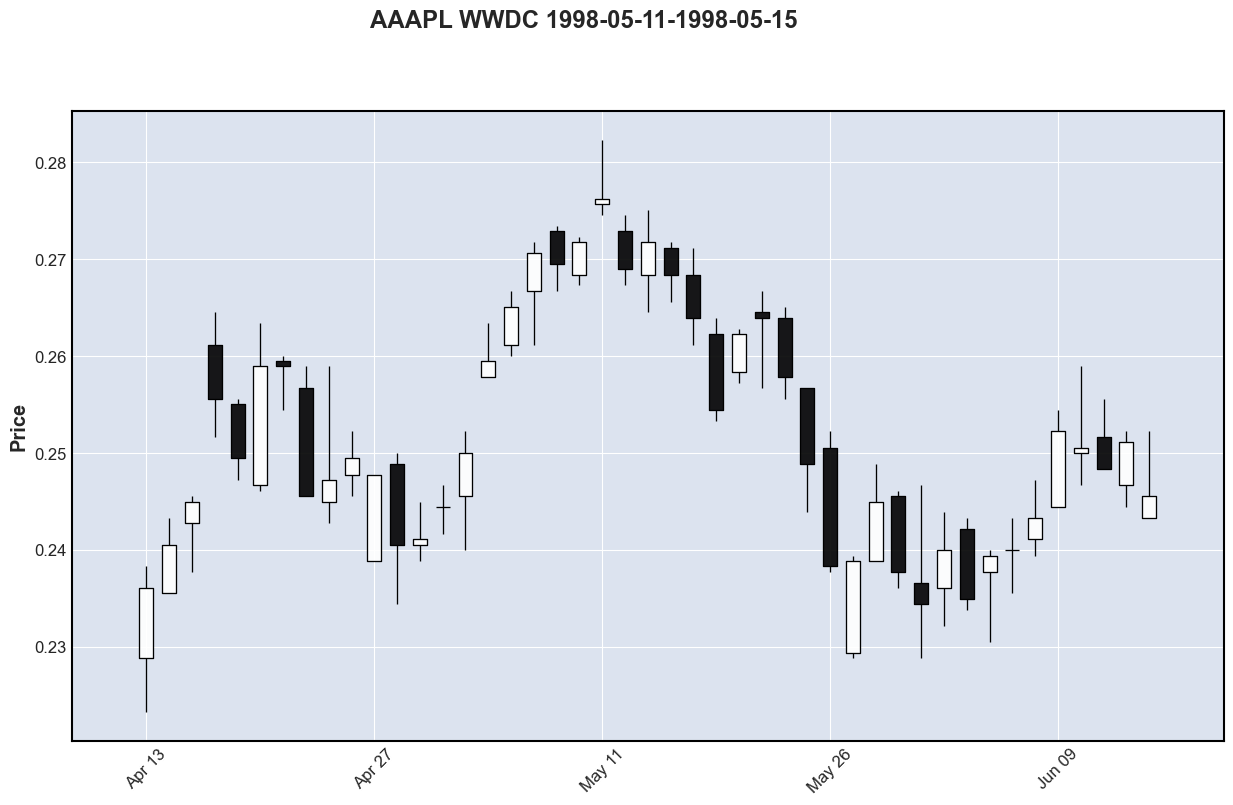

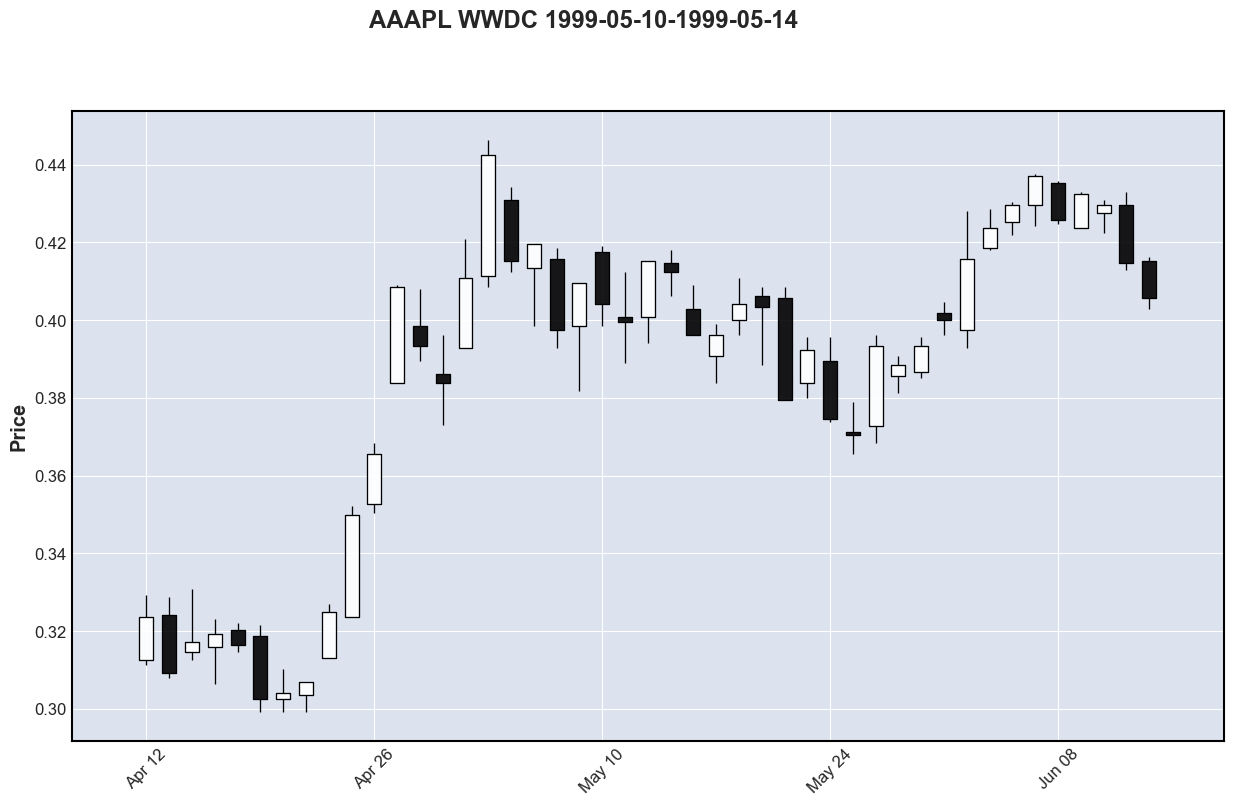

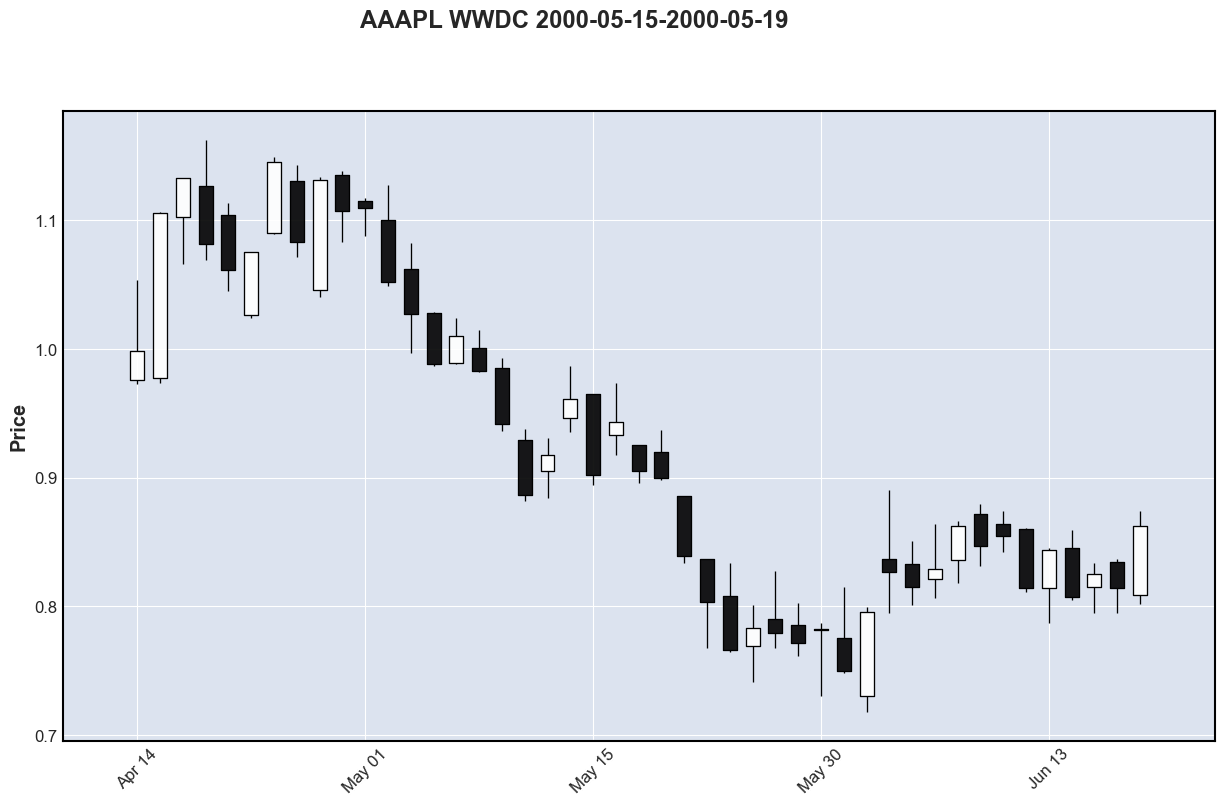

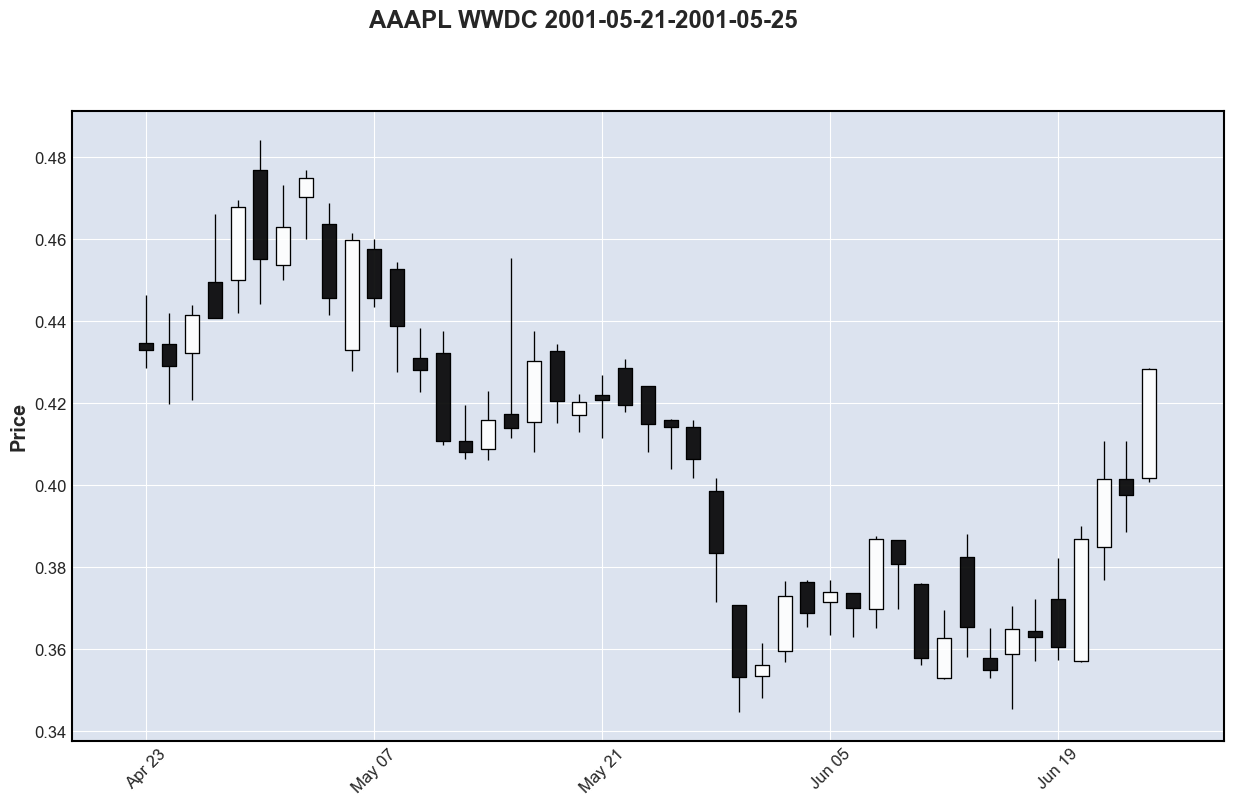

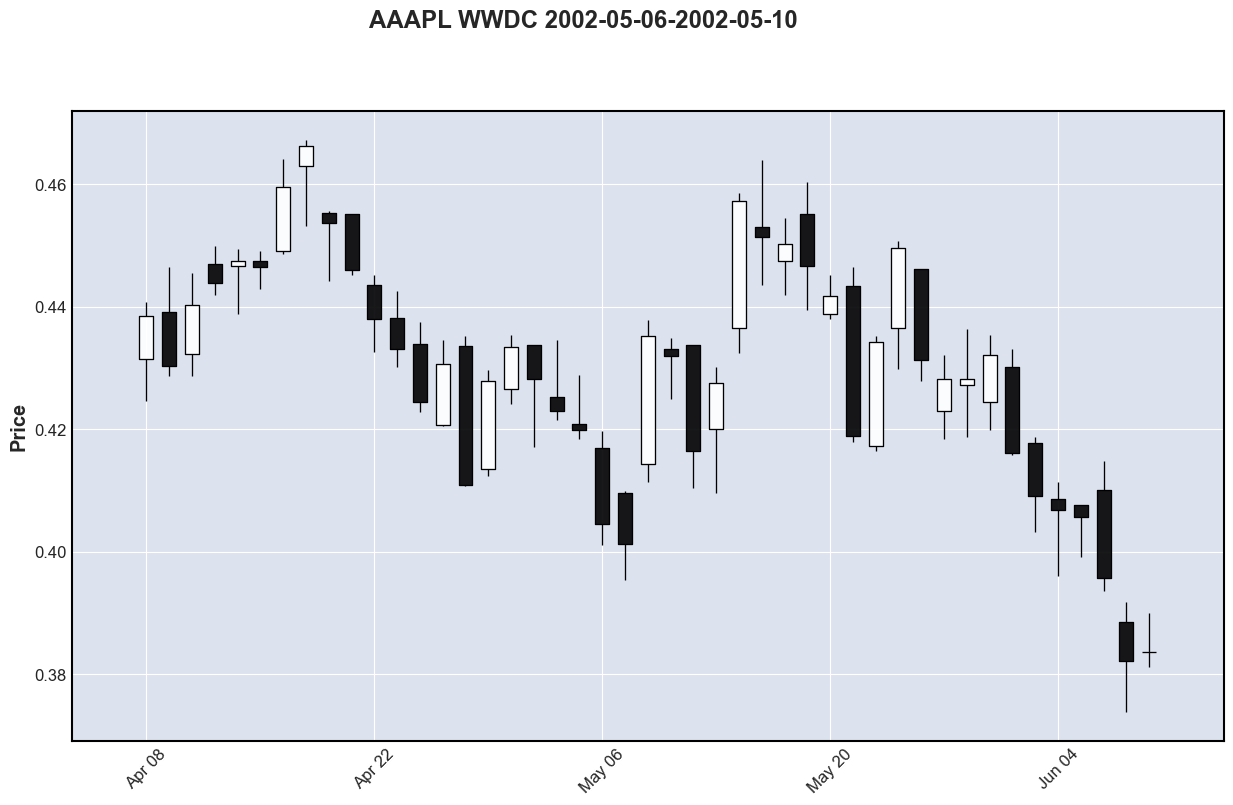

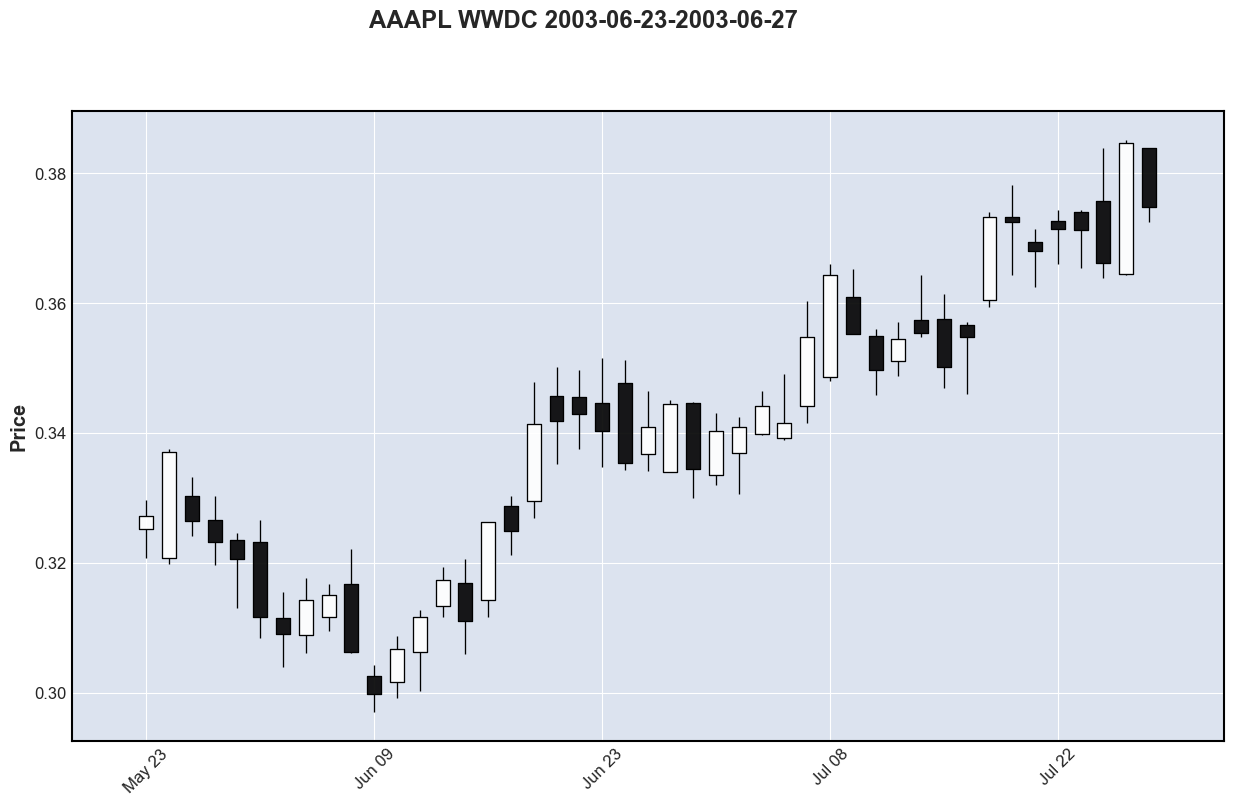

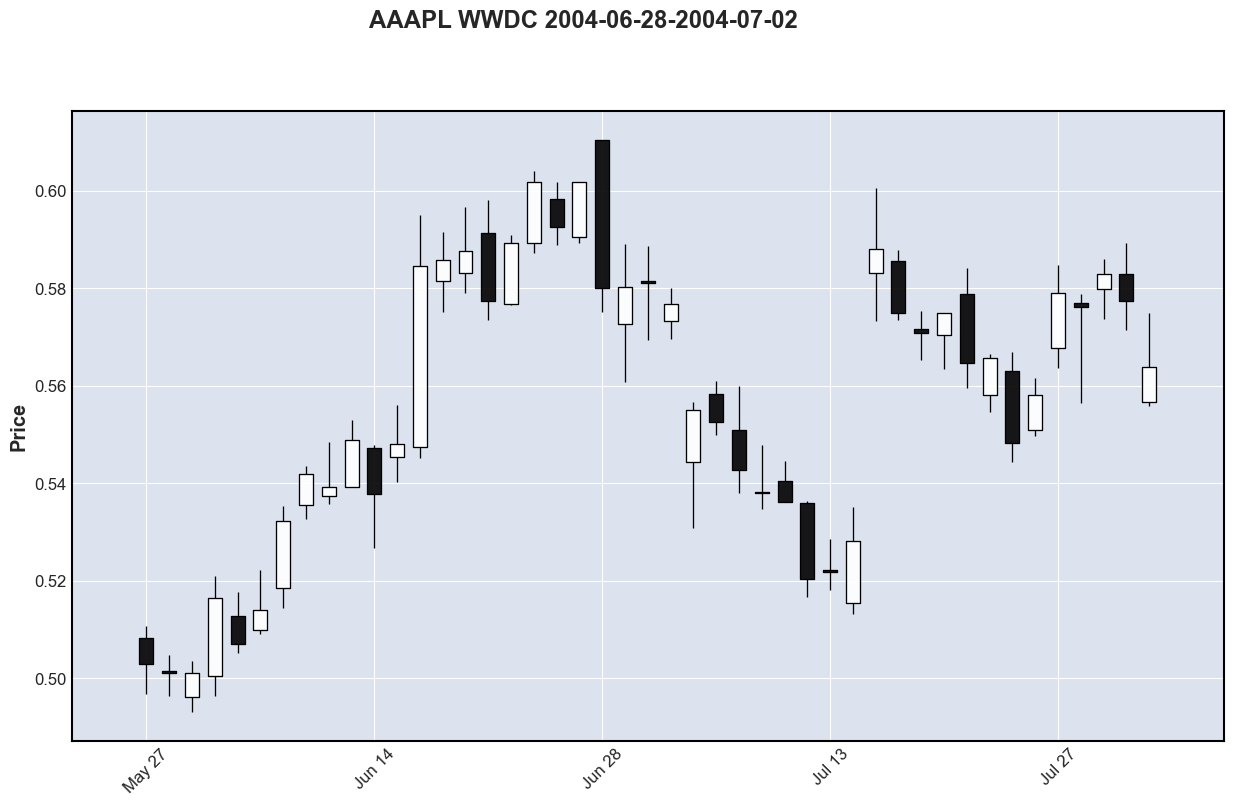

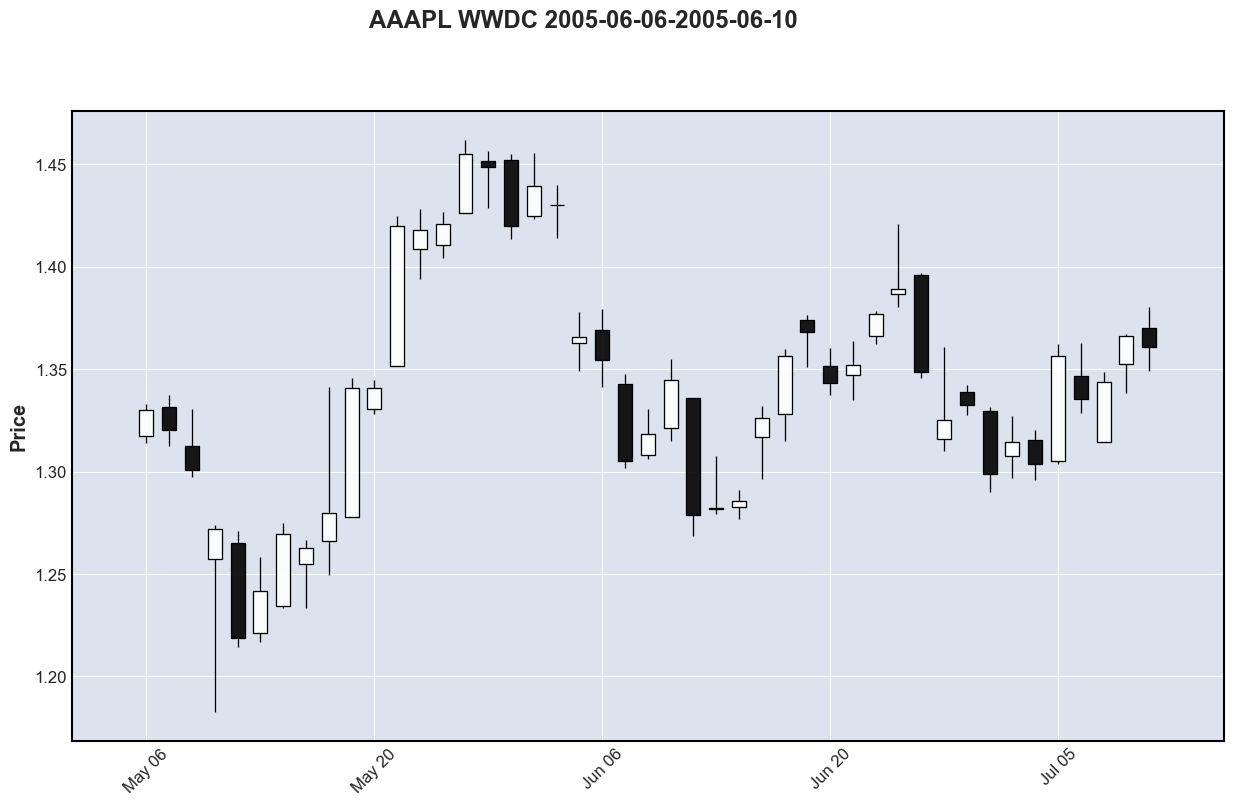

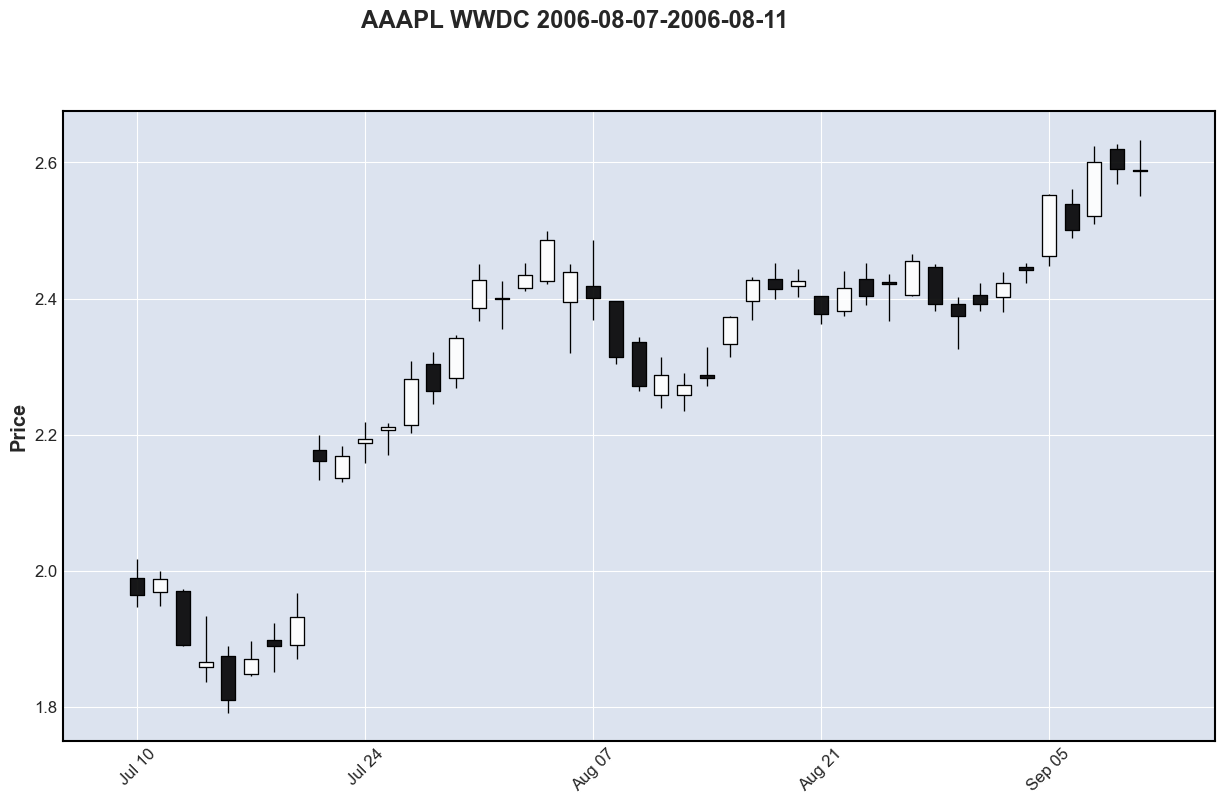

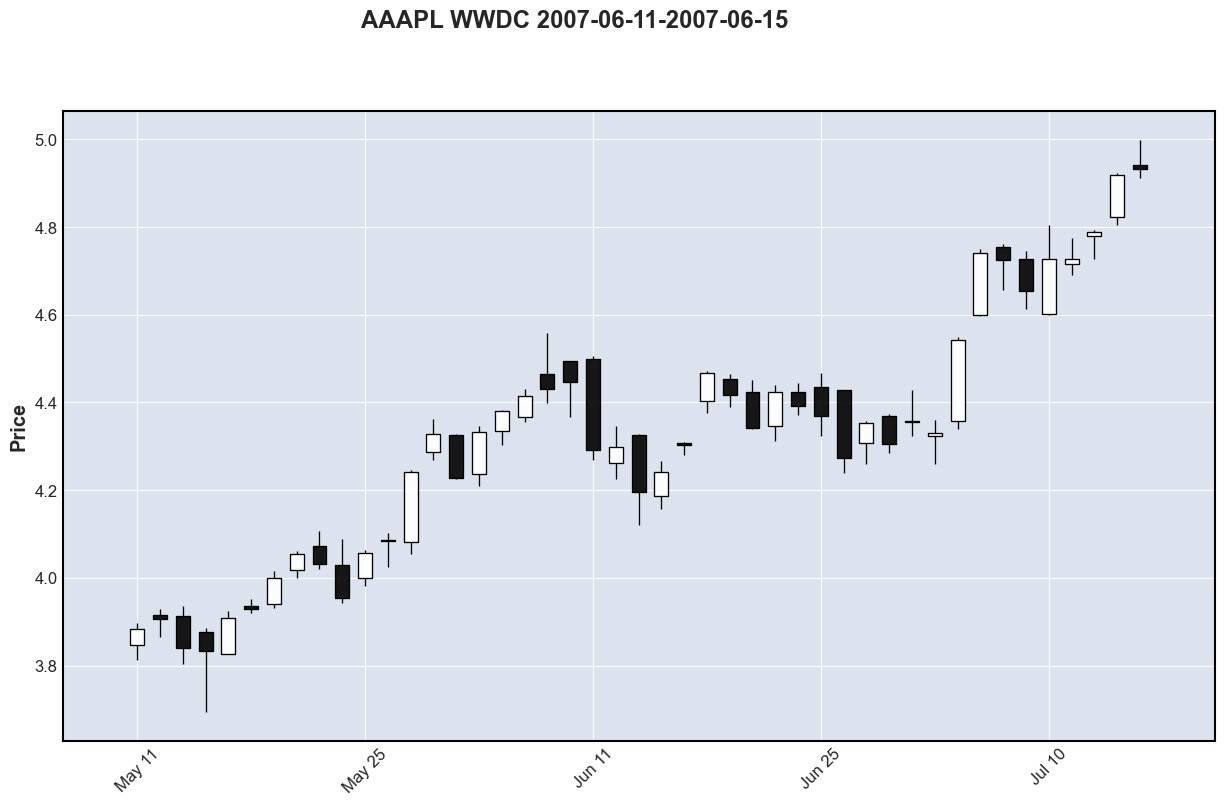

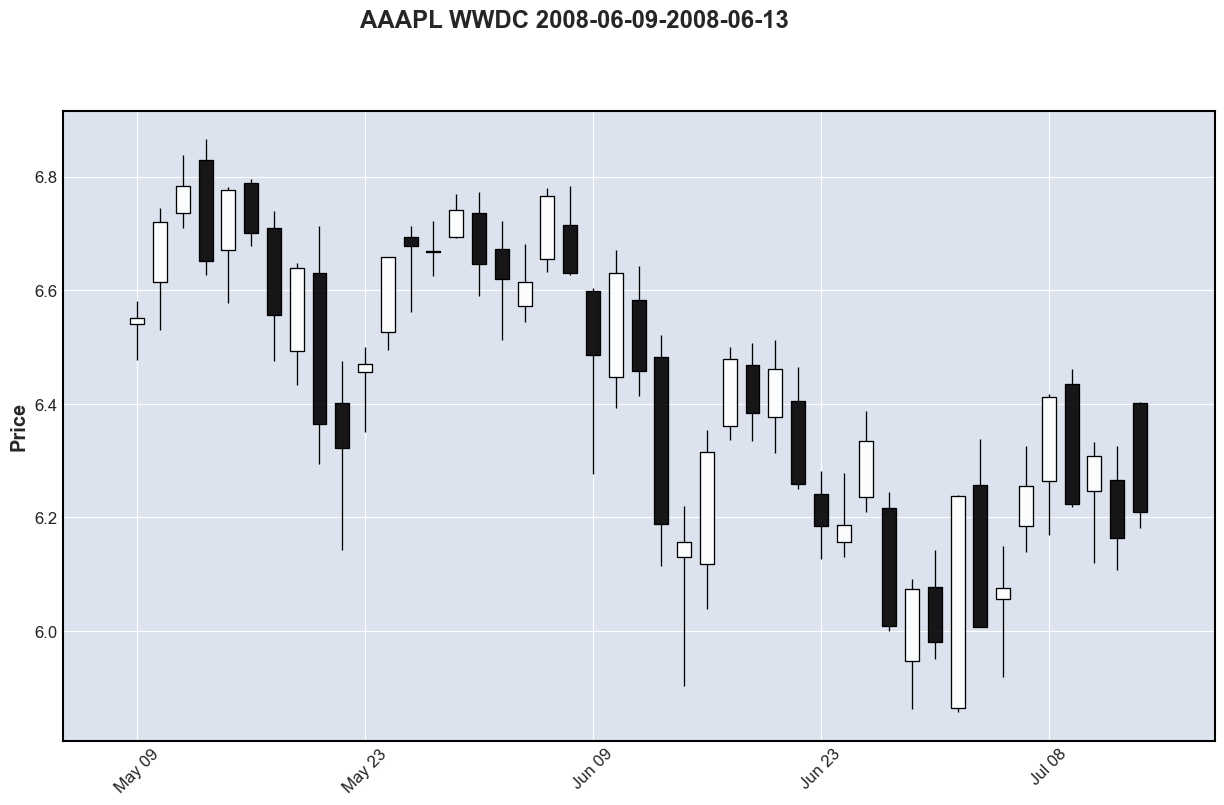

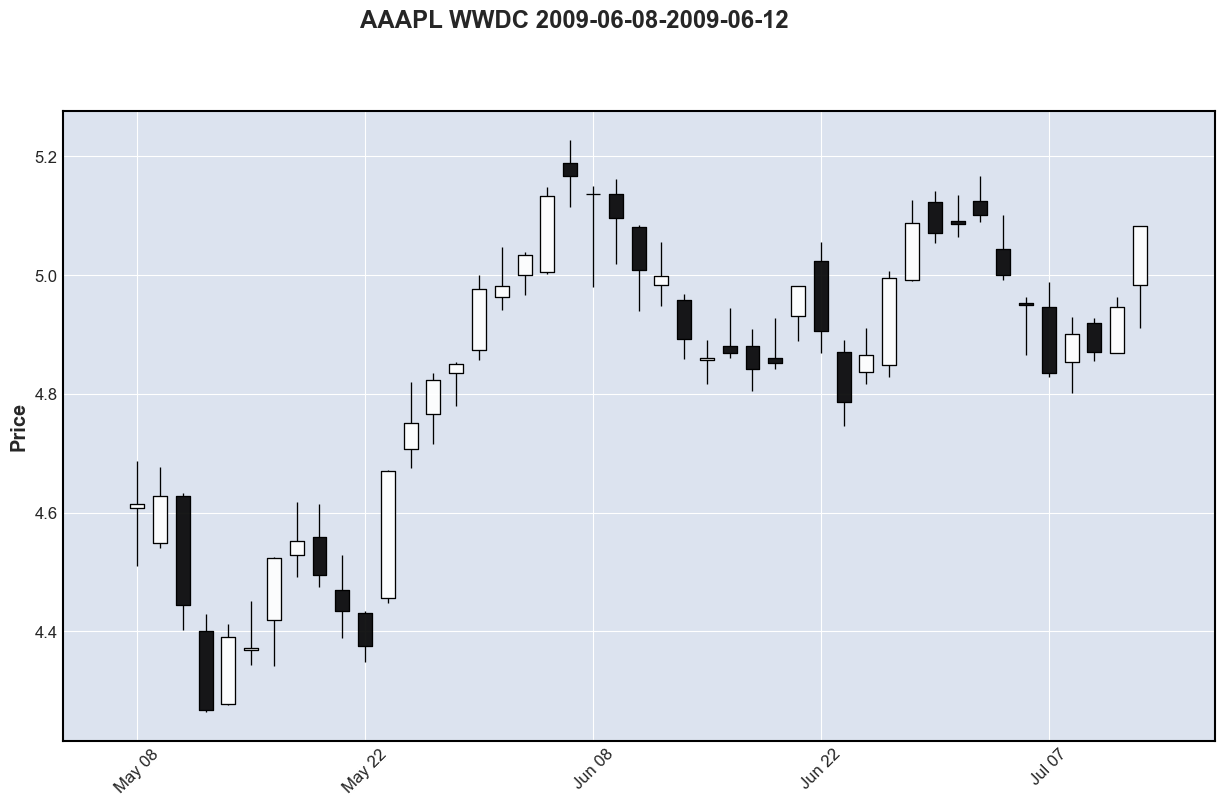

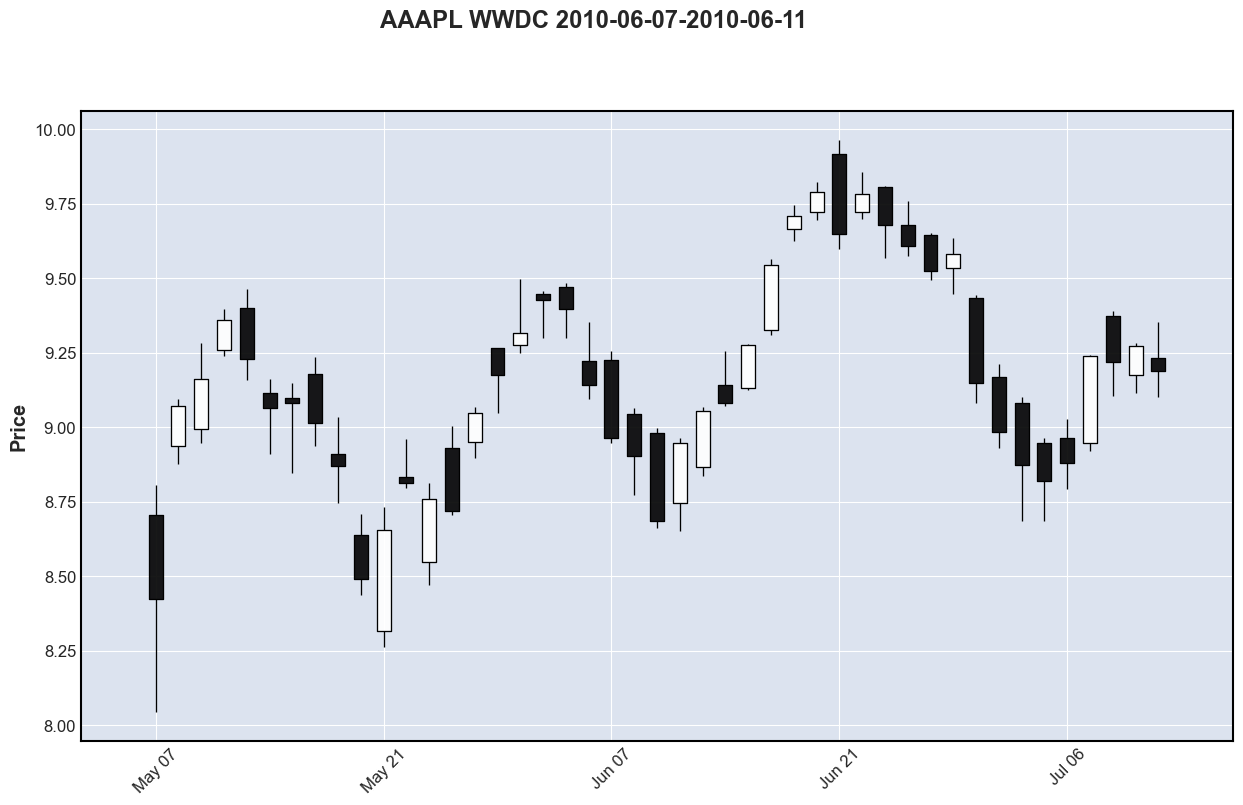

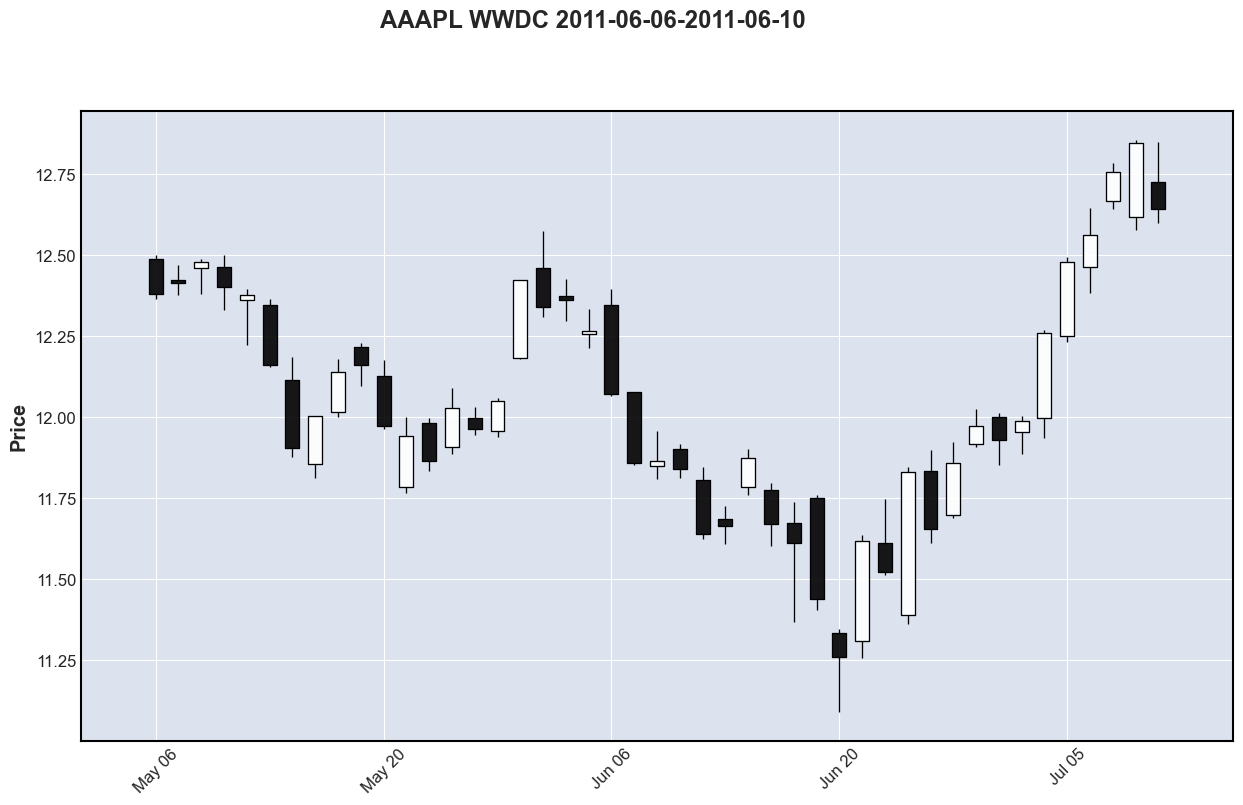

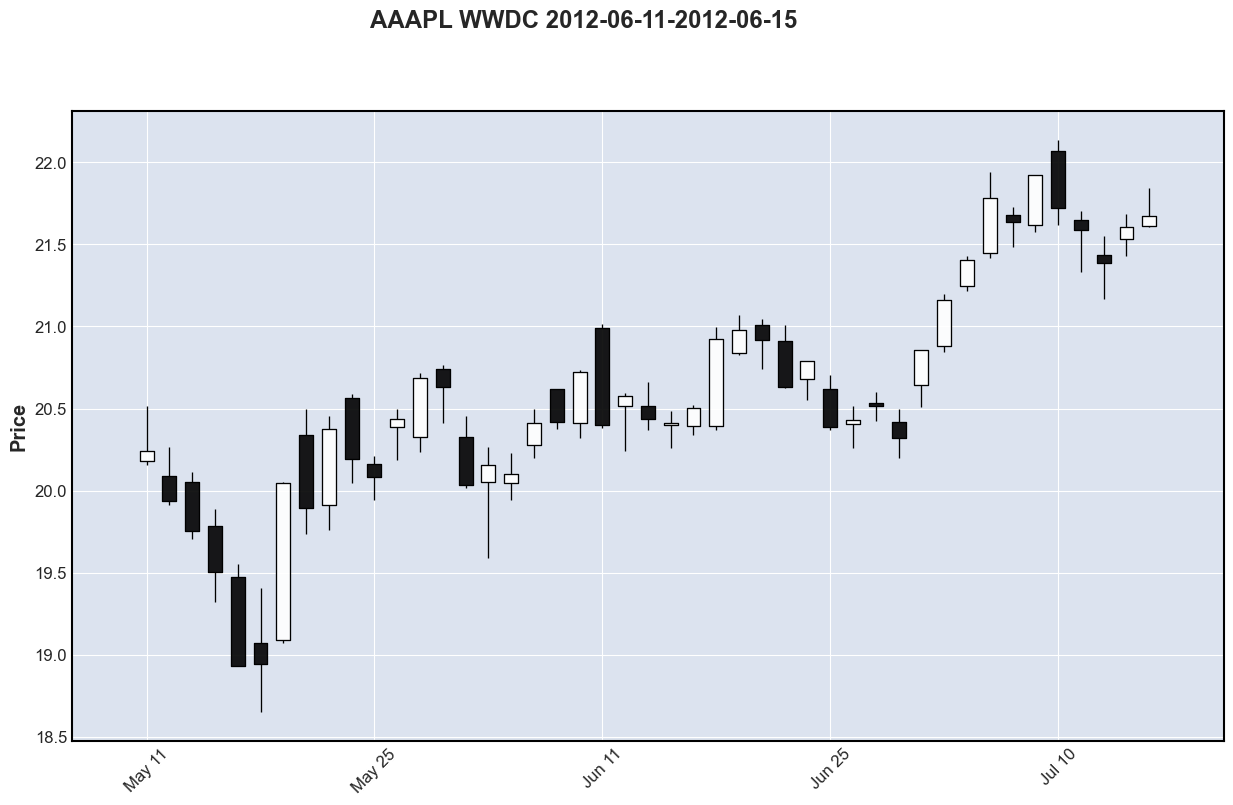

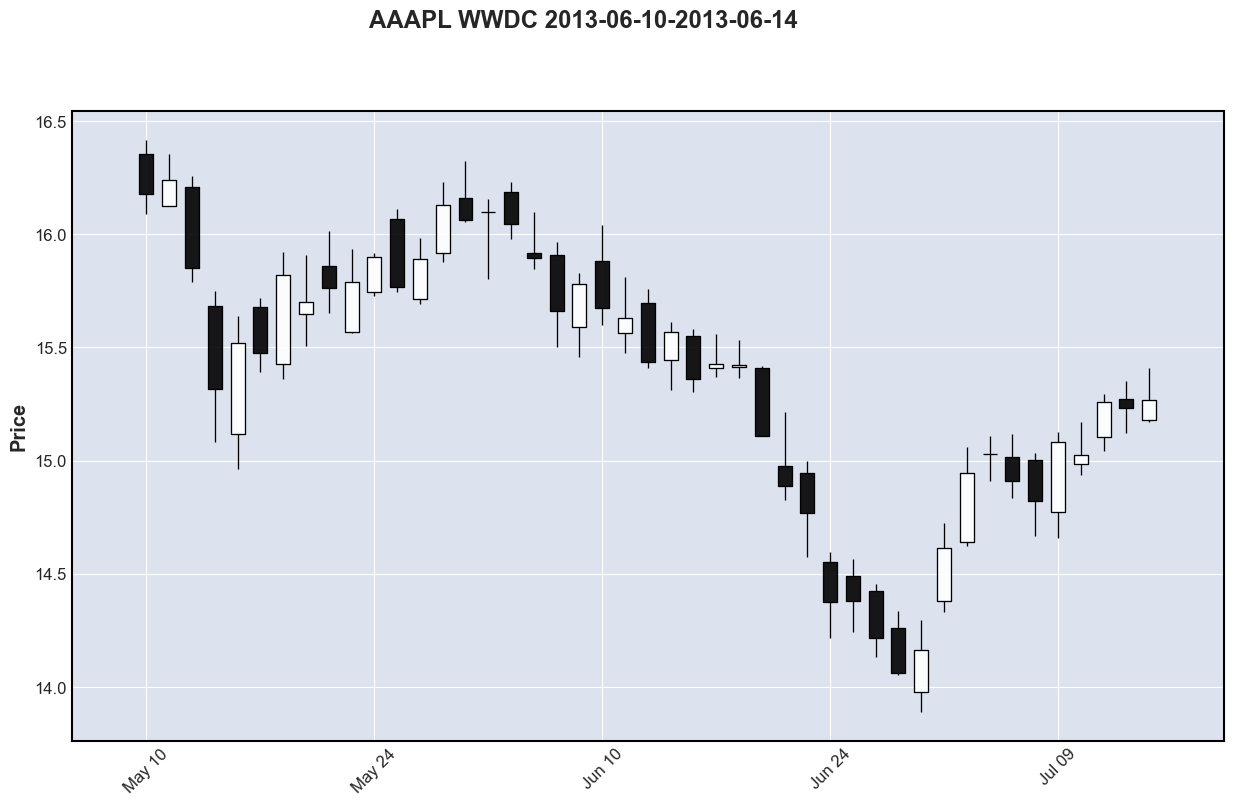

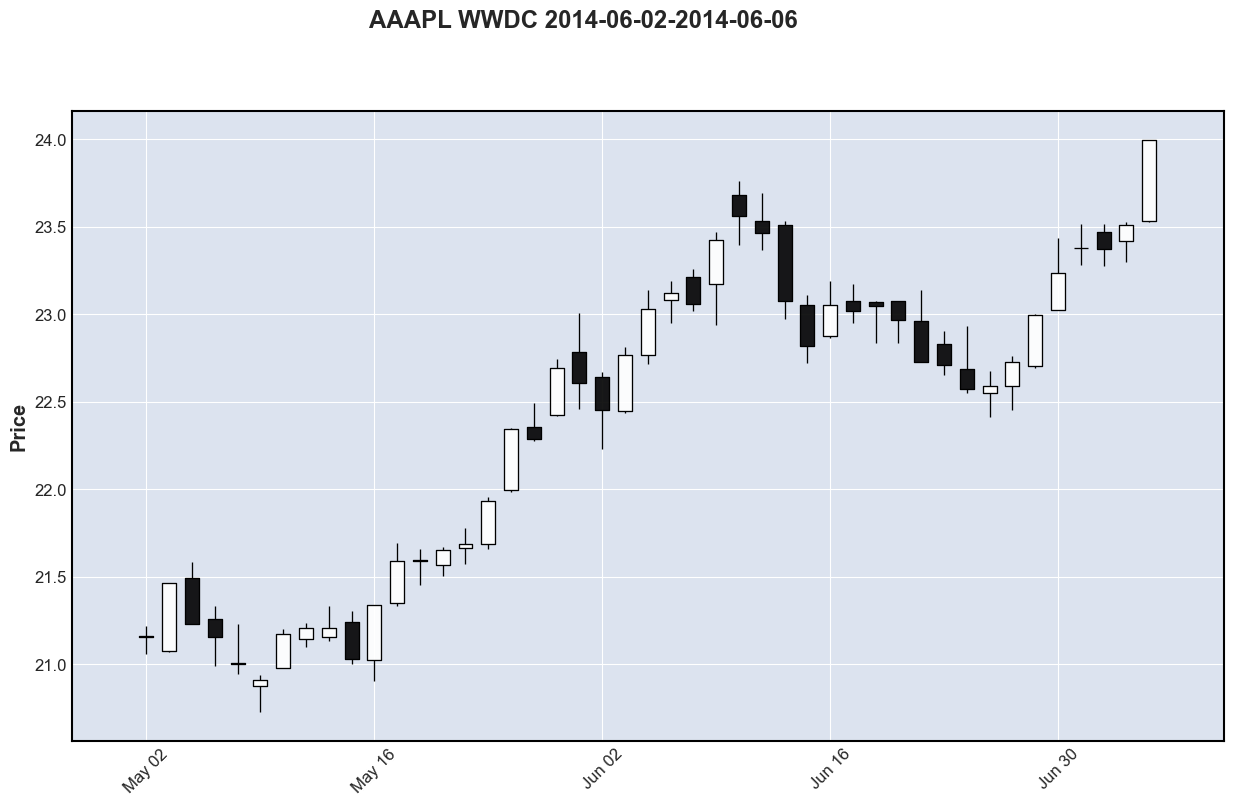

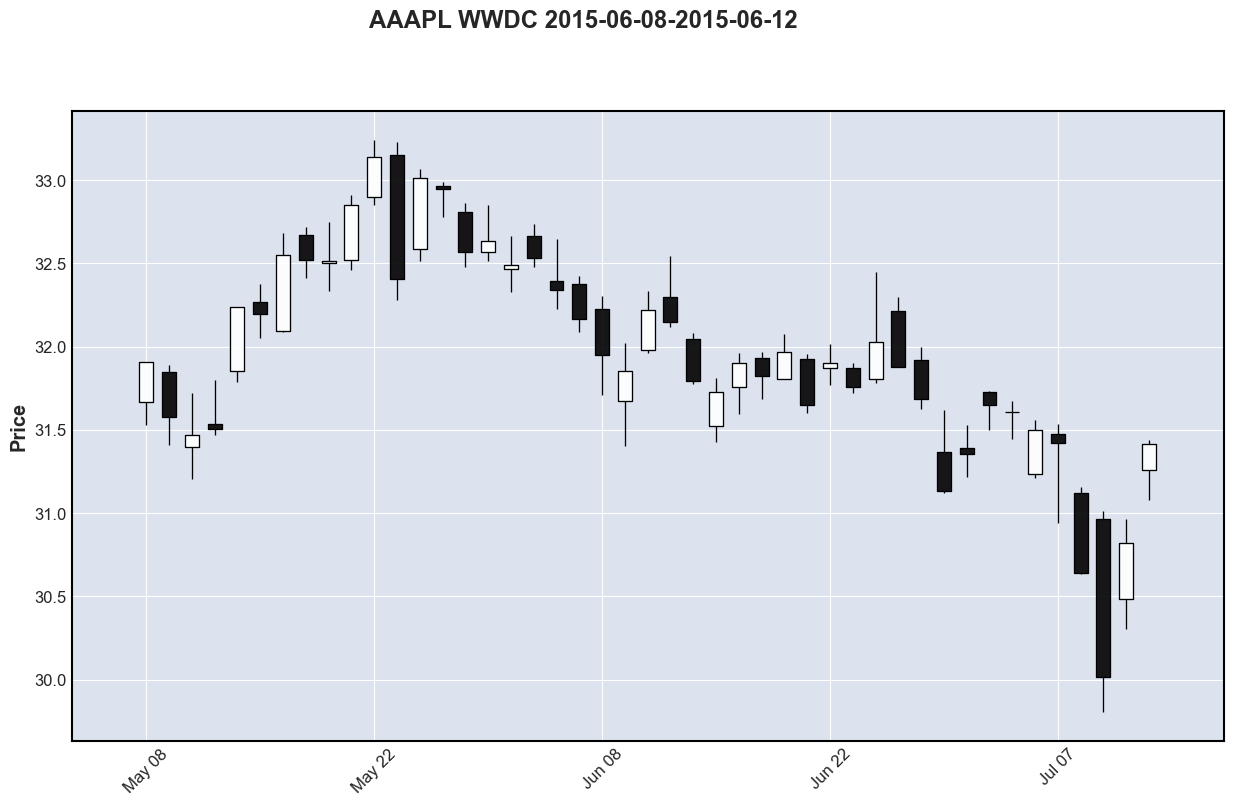

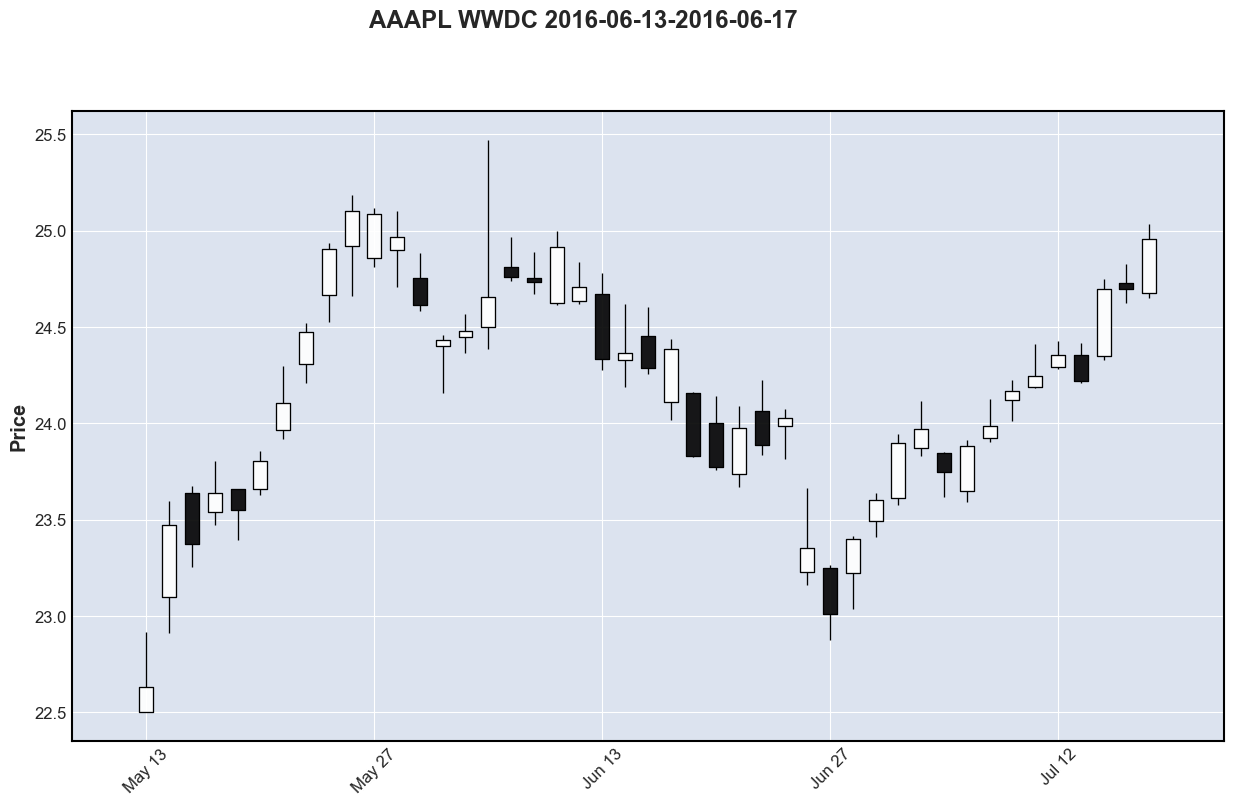

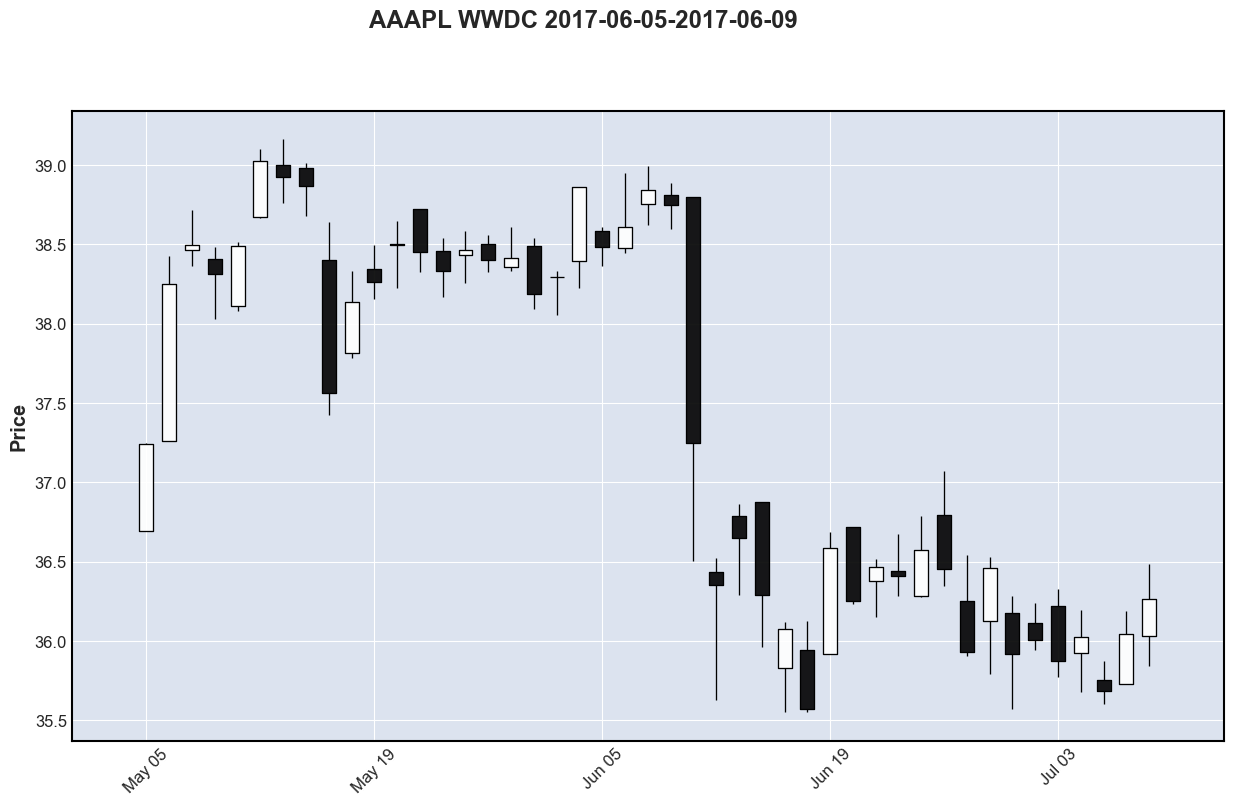

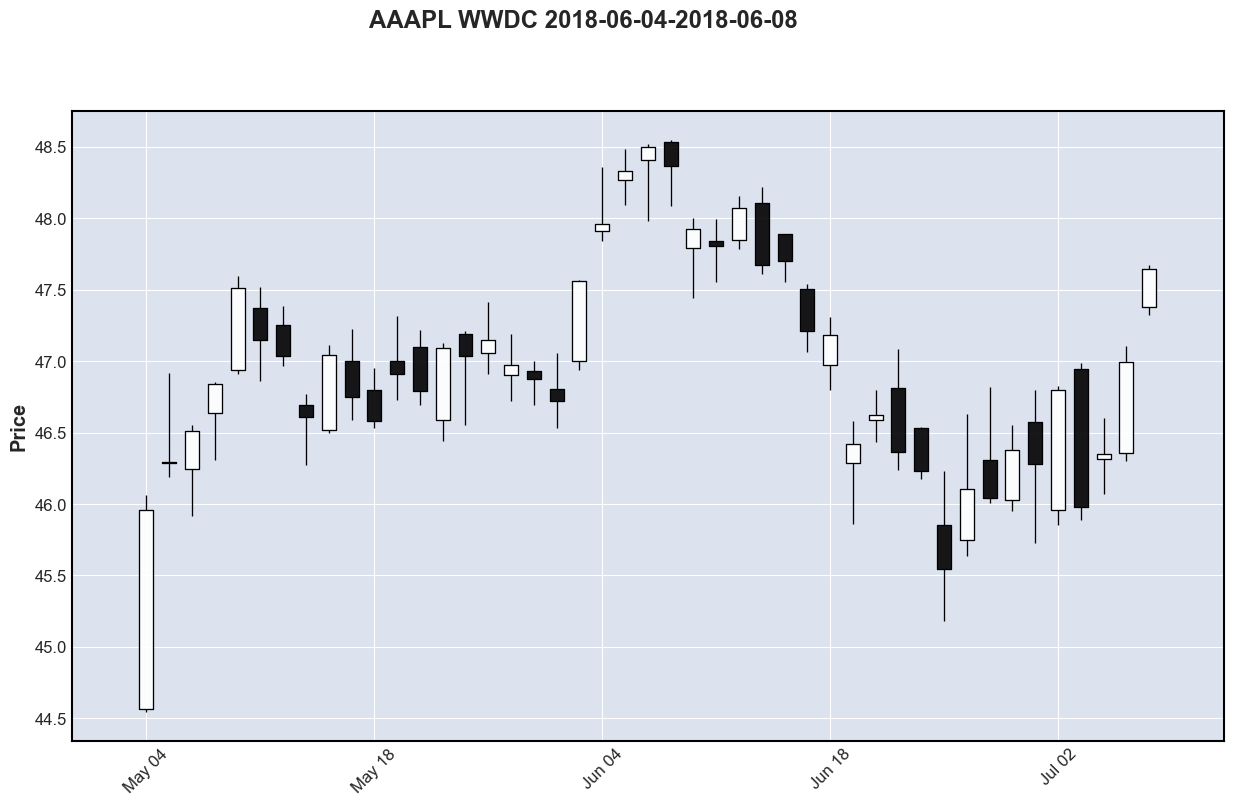

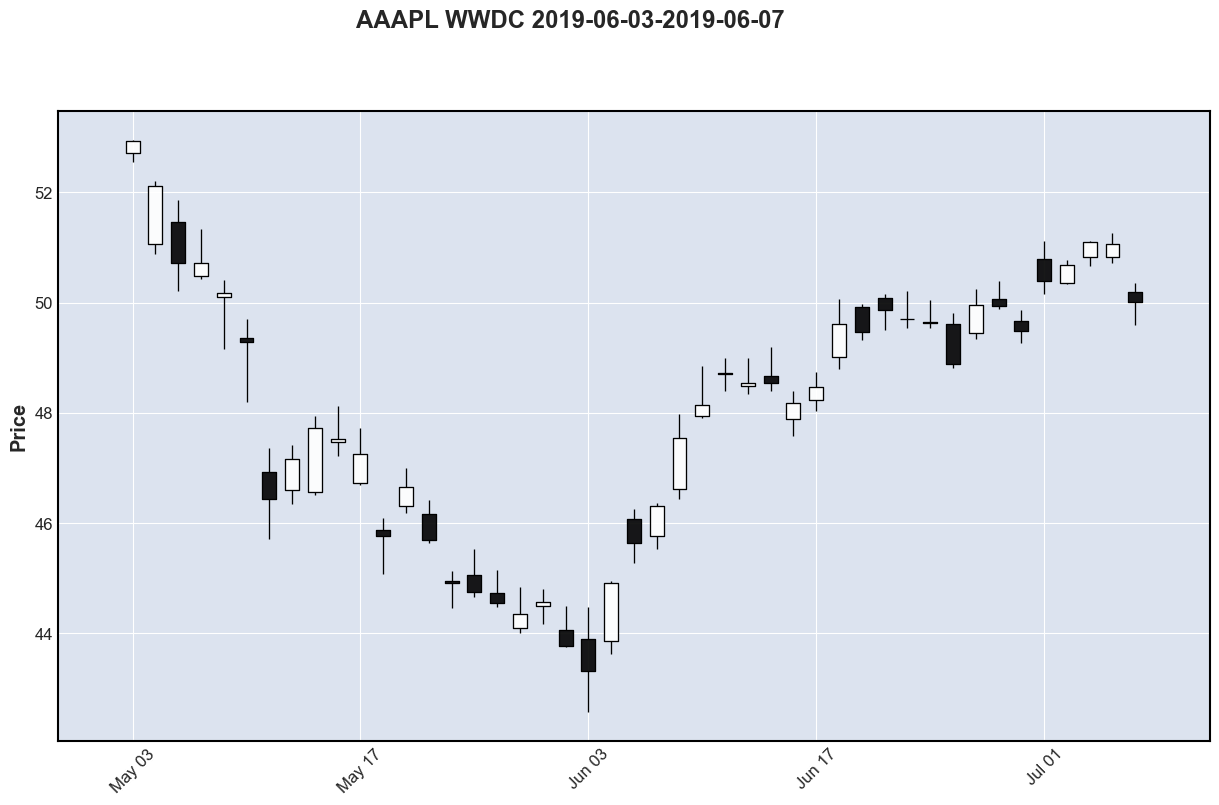

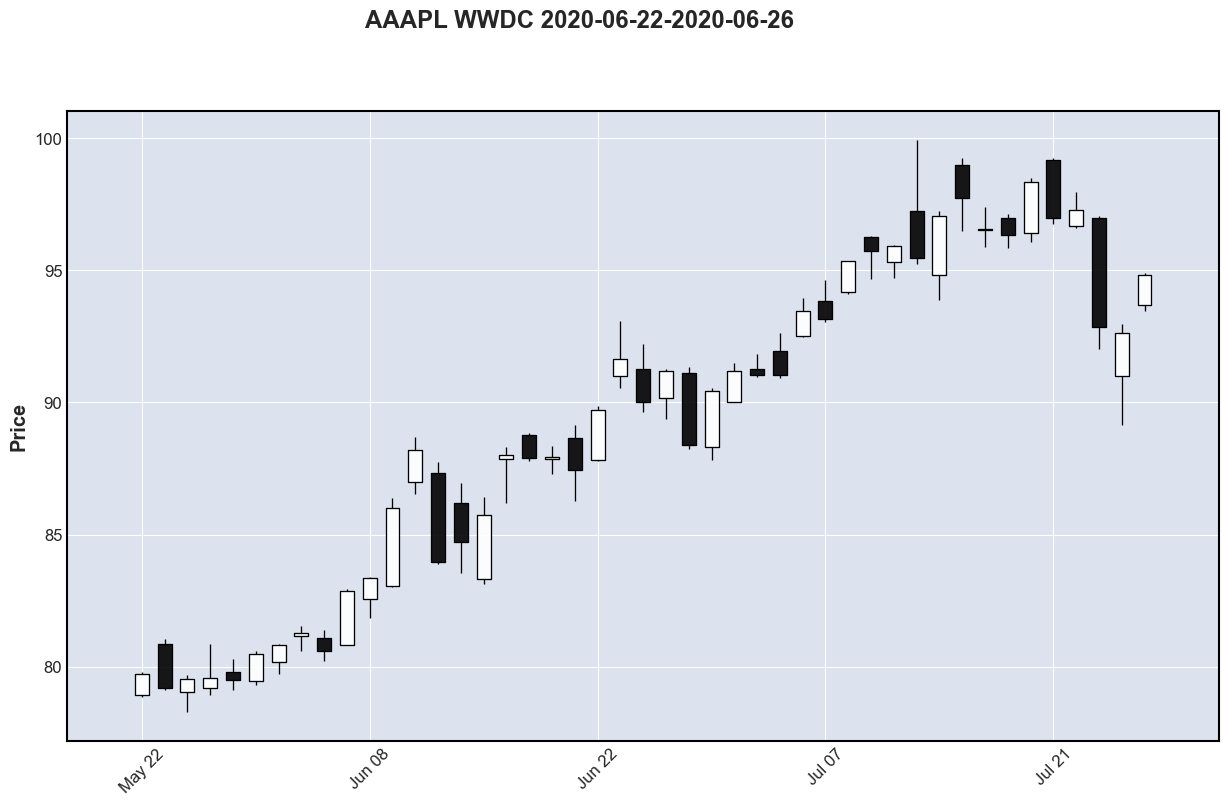

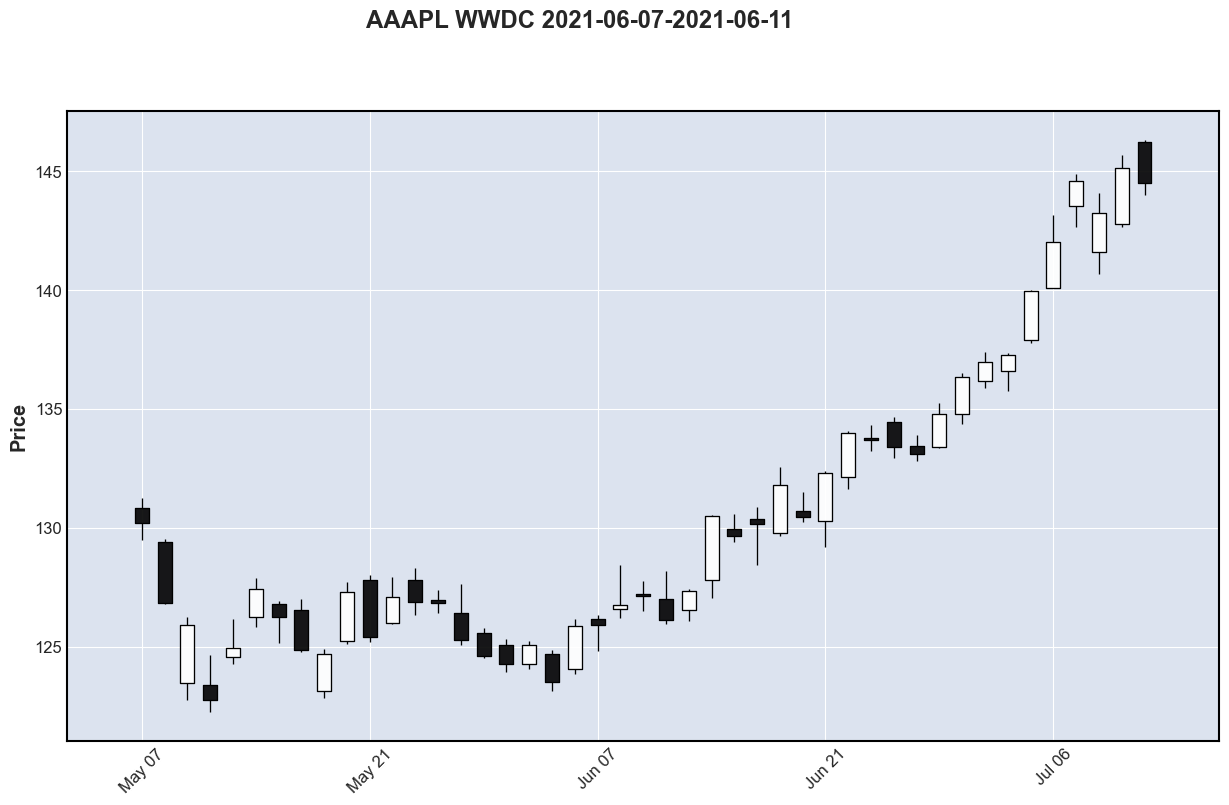

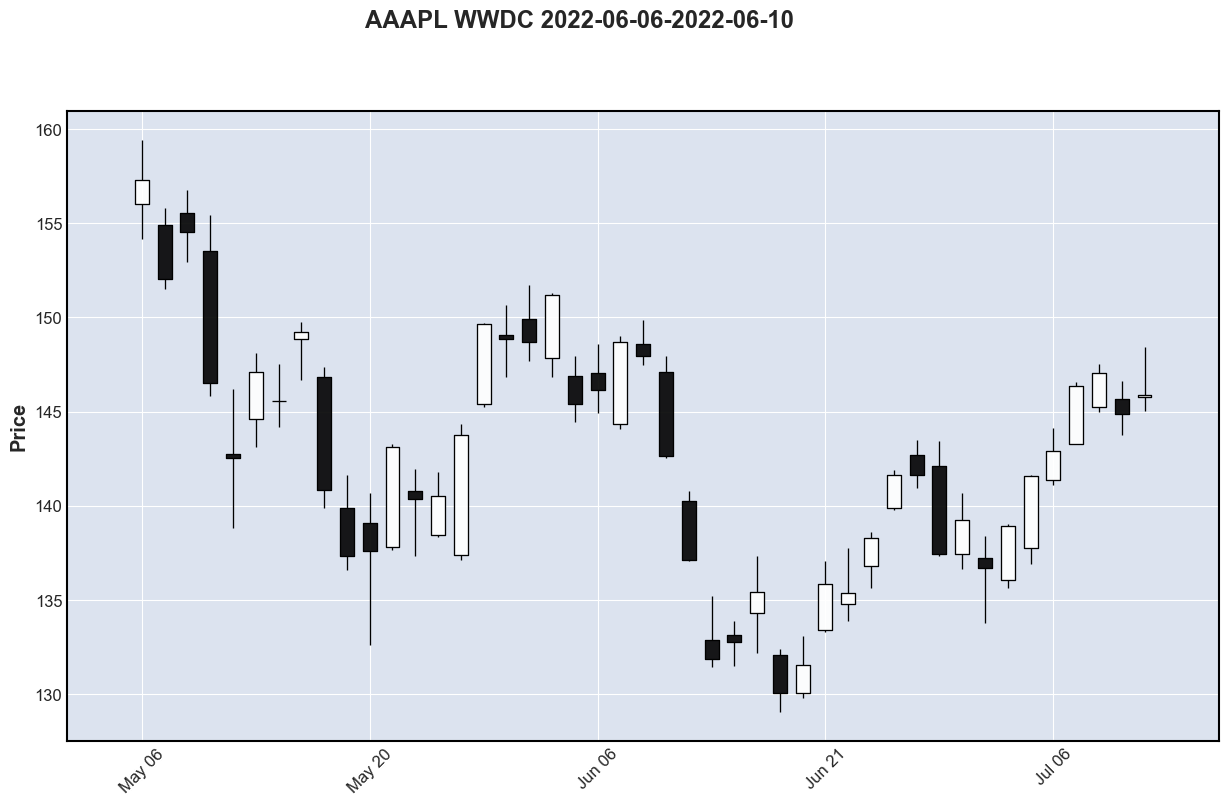

In [42]:
dates = list(df_AAPL['Date'])

for d_start_end in wwdc_days:

    d_start = d_start_end[0]
    d_end   = d_start_end[1]

    title = 'WWDC ' + d_start.isoformat() + '-' + d_end.isoformat()

    idx_start = dates.index(d_start) - 20
    if idx_start < 0:
        continue
    idx_end = dates.index(d_end) + 21
    if idx_end > len(dates):
        continue

    df_wwdc_aapl = df_AAPL.iloc[idx_start:idx_end].copy()

    assert df_wwdc_aapl is not None

    if len(df_wwdc_aapl) < 20: 
        continue

    df_wwdc_aapl['Date'] = pd.to_datetime(df_wwdc_aapl['Date'])

    df_wwdc_aapl.set_index('Date', inplace=True)
    mpf.plot(df_wwdc_aapl, type='candle', title=f'AAAPL {title}', figsize=(16, 9)
    # ,   savefig=f'fomc_{dt.date().isoformat()}_SPY.png'
    )


In [43]:
print(f"SPY  skew: {skew(df_SPY['return']):3.3f} kurtosis: {kurtosis(df_SPY['return']):3.3f}")
print(f"AAPL skew: {skew(df_AAPL['return']):3.3f} kurtosis: {kurtosis(df_AAPL['return']):3.3f}")


SPY  skew: -0.283 kurtosis: 10.856
AAPL skew: -1.732 kurtosis: 46.683
